In [163]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from matplotlib import rcParams
import numpy as np
import datetime
import holidays

In [164]:
df = pd.read_csv("germany_final.csv")
df.head()

,data,price,temp,dew,humidity,windspeed,cloudcover,Biomass,Fossil Brown coal/Lignite,Fossil Gas,...,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore
0,2021-01-01 00:00:00+01:00,50.87,1.9,0.2,88.5,10.0,63.9,4631.25,11608.50,5657.0,...,347.25,1182.00,48.25,8144.75,454.25,196.00,0.0,787.00,383.00,3943.00
1,2021-01-01 01:00:00+01:00,48.19,1.9,0.2,88.5,10.0,63.9,4619.25,11602.75,5417.0,...,518.50,1174.75,46.25,8150.25,454.00,196.00,0.0,785.75,394.50,3549.75
2,2021-01-01 02:00:00+01:00,44.68,1.9,0.2,88.5,10.0,63.9,4617.25,11758.50,5319.0,...,219.00,1158.25,30.25,8156.50,454.00,196.00,0.0,779.00,305.25,3223.25
3,2021-01-01 03:00:00+01:00,42.92,1.9,0.2,88.5,10.0,63.9,4606.00,12337.50,5134.5,...,2.00,1155.50,48.75,8153.75,454.25,196.00,0.0,770.75,319.25,2793.75
4,2021-01-01 04:00:00+01:00,40.39,1.9,0.2,88.5,10.0,63.9,4606.75,12395.00,4999.5,...,6.00,1152.50,26.75,8150.50,465.00,200.75,0.0,760.50,296.25,2499.25


In [165]:
df.nunique()

data                               18864
price                              13499
temp                                 276
dew                                  247
humidity                             393
windspeed                            253
cloudcover                           521
Biomass                             4188
Fossil Brown coal/Lignite          14409
Fossil Gas                         14758
Fossil Hard coal                   15619
Fossil Oil                          1725
Geothermal                           109
Hydro Pumped Storage                8697
Hydro Run-of-river and poundage     4829
Hydro Water Reservoir               1688
Nuclear                             7711
Other                               1386
Other renewable                      466
Solar                               9256
Waste                               2328
Wind Offshore                      13144
Wind Onshore                       17064
dtype: int64

In [166]:
df.isnull().sum()

data                               0
price                              0
temp                               0
dew                                0
humidity                           0
windspeed                          0
cloudcover                         0
Biomass                            0
Fossil Brown coal/Lignite          0
Fossil Gas                         0
Fossil Hard coal                   0
Fossil Oil                         0
Geothermal                         0
Hydro Pumped Storage               0
Hydro Run-of-river and poundage    0
Hydro Water Reservoir              0
Nuclear                            0
Other                              0
Other renewable                    0
Solar                              0
Waste                              0
Wind Offshore                      0
Wind Onshore                       0
dtype: int64

# Data Transform

In [167]:
keys = list(df.columns)
keys.remove("data")

In [168]:
rcParams['figure.figsize'] = 20,30
keys = list(df.columns)
keys.remove("data")
keys.remove("price")

def plot_distributions(df: DataFrame, num_rows: int, num_cols: int, keys: list):


    for i, col in enumerate(keys):
        plt.subplot(num_rows, num_cols, i+1)
        sns.histplot(df[col], kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()

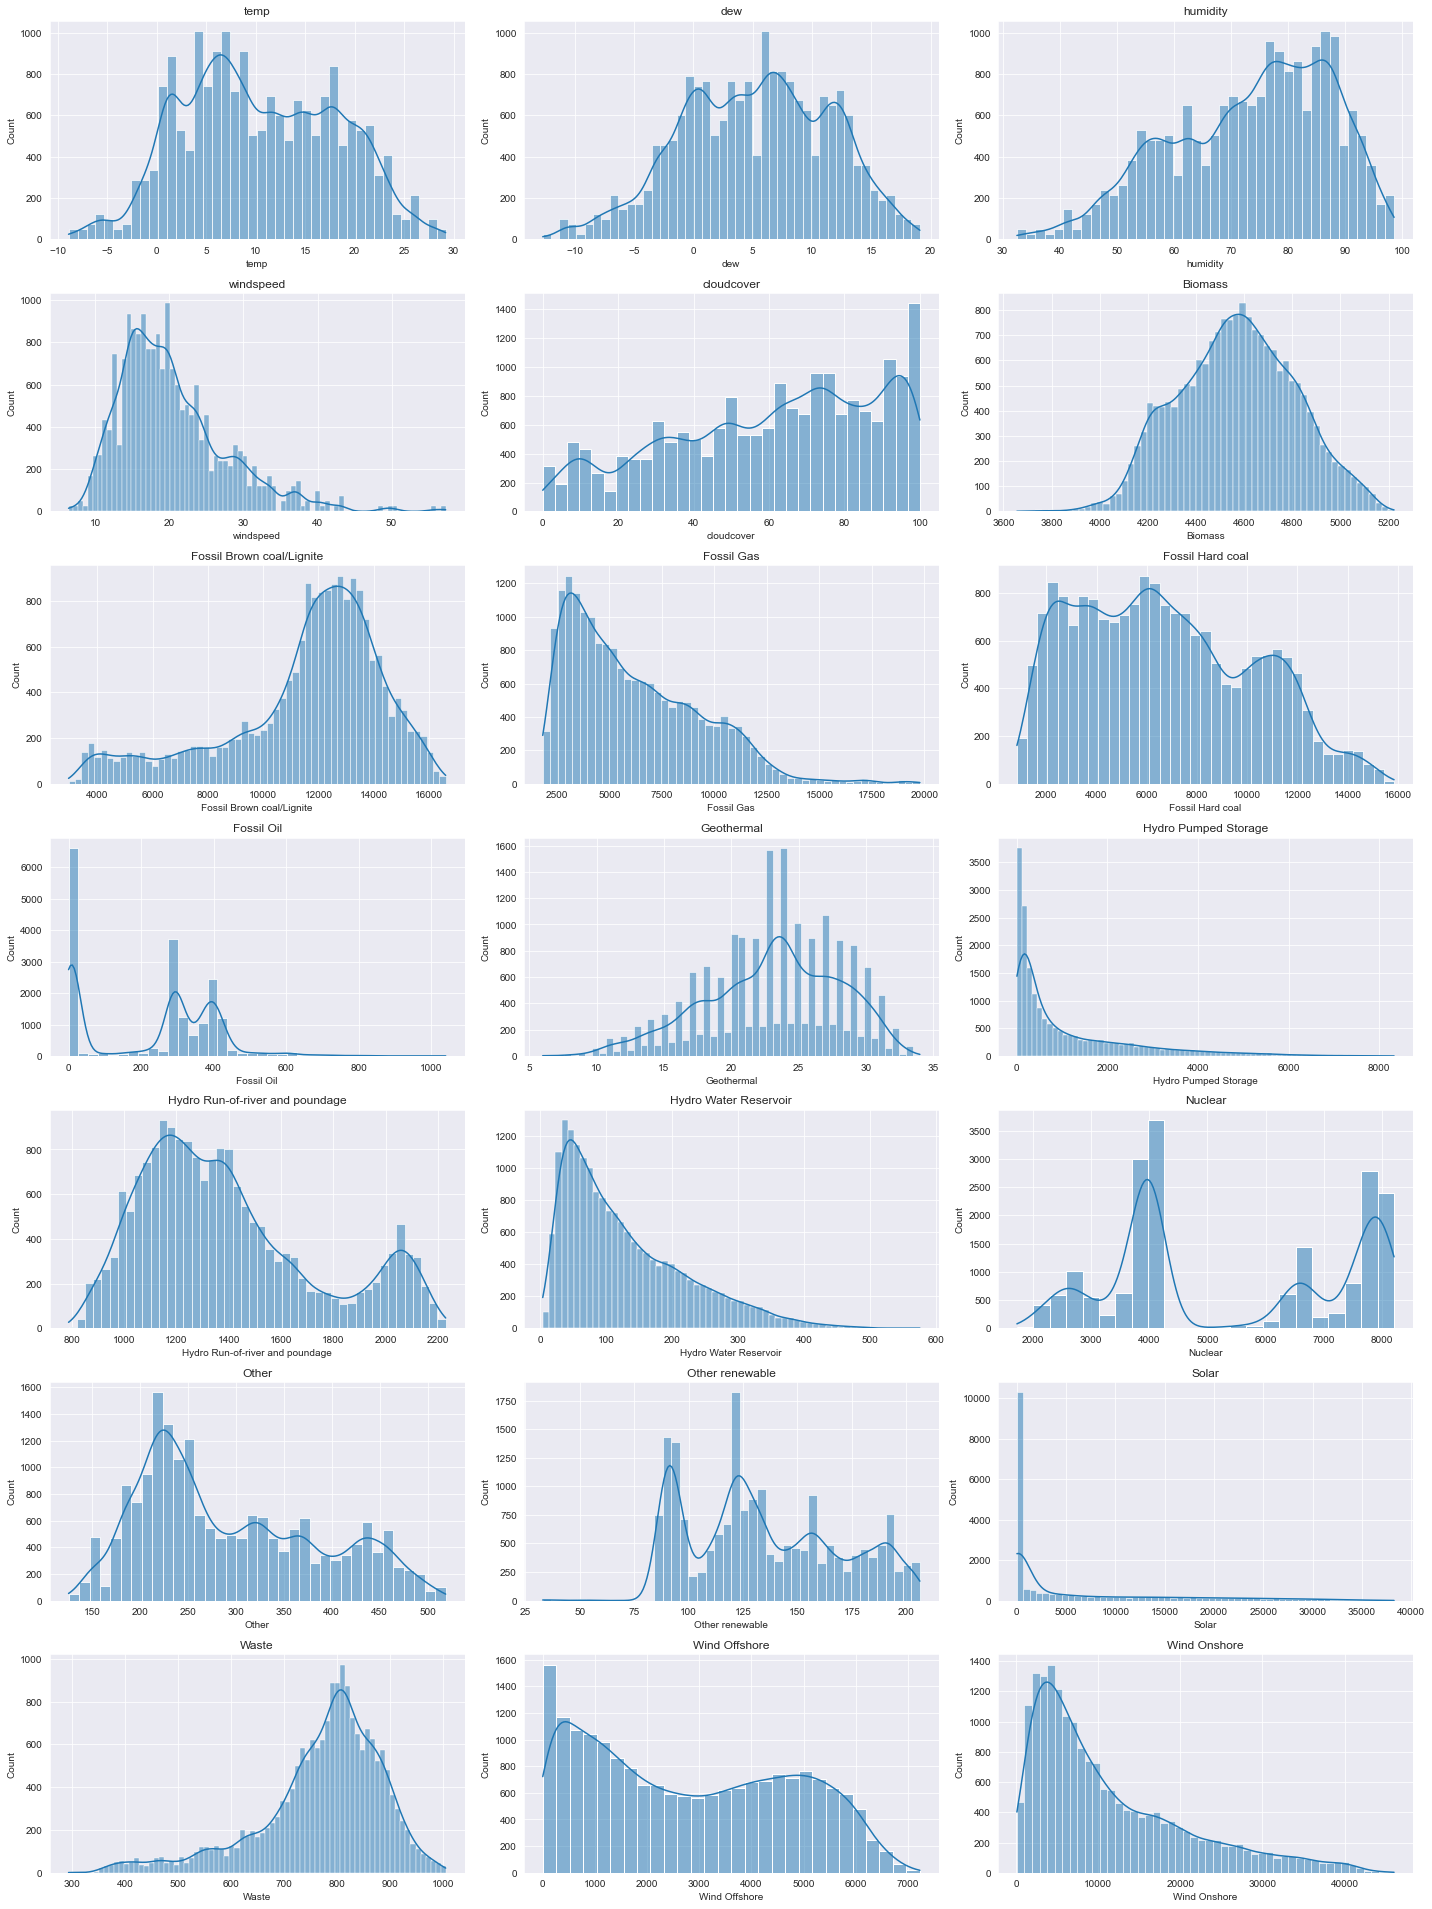

In [169]:
plot_distributions(df,8,3,keys)

In [170]:
test = df[keys]
pt = PowerTransformer()
new = pt.fit_transform(test)
new_df = pd.DataFrame(new, columns = keys)

In [171]:
def power_transformation(df: DataFrame, keys: list):
    try:
        pt = PowerTransformer(method='box-cox')
        new = pt.fit_transform(df[keys])
        new_df = pd.DataFrame(new, columns = keys)
    except ValueError:
        pt = PowerTransformer()
        new = pt.fit_transform(df[keys])
        new_df = pd.DataFrame(new, columns = keys)

    return new_df

In [172]:
neg_keys = ['temp',
 'dew',
 'humidity',
 'windspeed',
 'cloudcover'
]

In [173]:
pos_keys = [
 'Biomass',
 'Fossil Brown coal/Lignite',
 'Fossil Gas',
 'Fossil Hard coal',
 'Fossil Oil',
 'Geothermal',
 'Hydro Pumped Storage',
 'Hydro Run-of-river and poundage',
 'Hydro Water Reservoir',
 'Nuclear',
 'Other',
 'Other renewable',
 'Solar',
 'Waste',
 'Wind Offshore',
 'Wind Onshore'
]

In [174]:
df_neg = power_transformation(df, neg_keys)
df_pos = power_transformation(df, pos_keys)

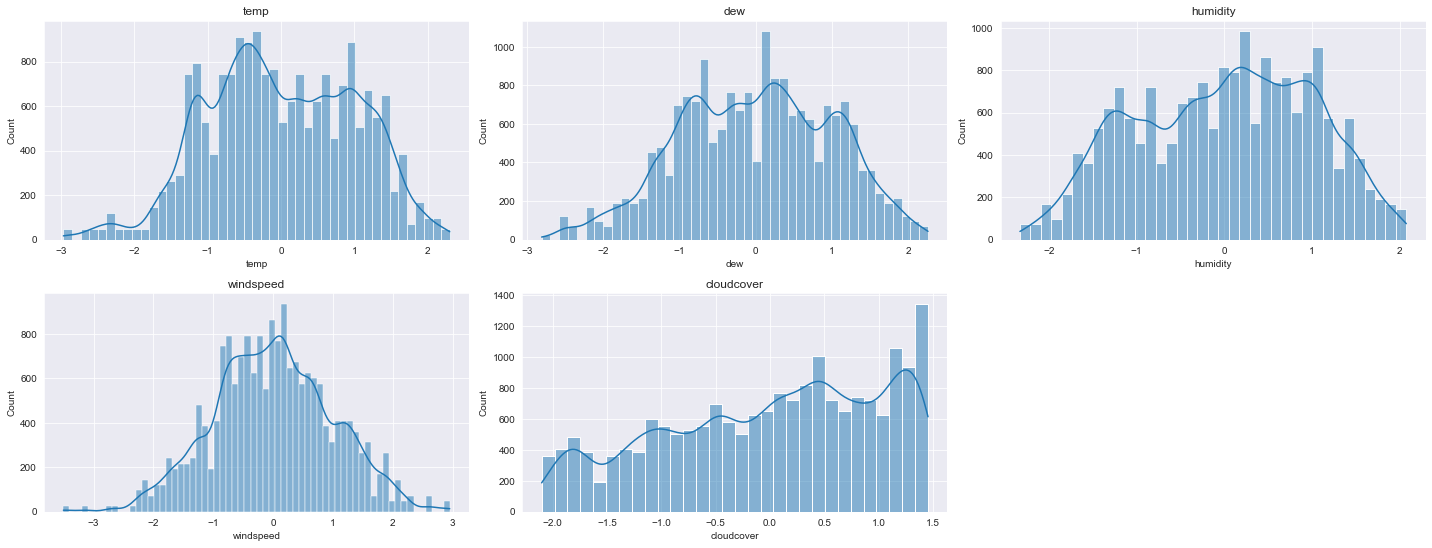

In [175]:
plot_distributions(df_neg,8,3, neg_keys)

In [176]:
neg_keys_f = ['temp',
 'dew',
 'humidity',
 'windspeed',
 'cloudcover'
]

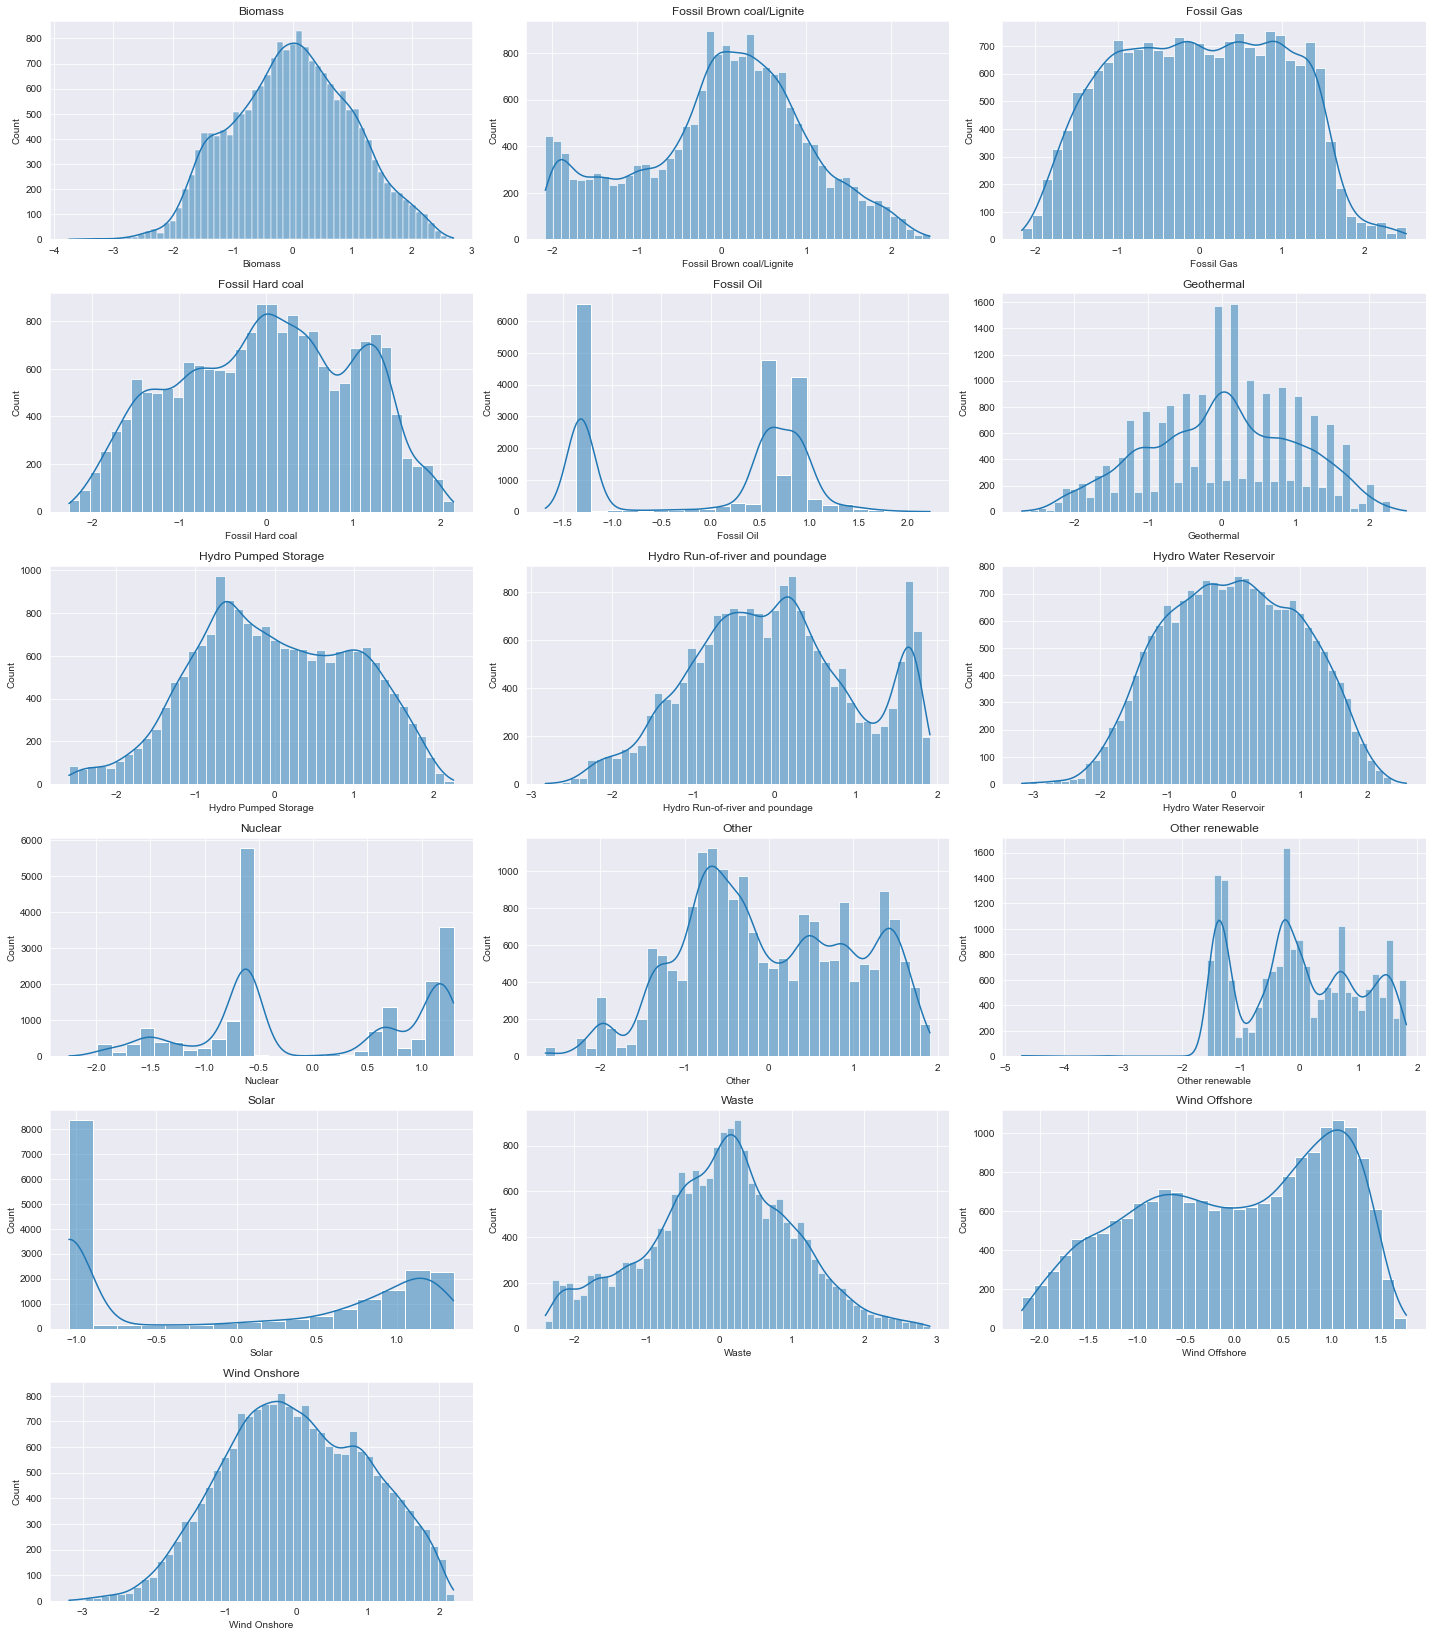

In [177]:
plot_distributions(df_pos,8,3, pos_keys)

# Adding new variables

In [178]:
df.data = pd.to_datetime(df.data)

In [179]:
def is_weekend(date):
    if date.weekday() in [5,6]:
        return 1
    else:
        return 0

In [180]:
df["weekend"] = df.data.apply(lambda x: is_weekend(x))

In [181]:
def is_holiday(date):
    de_holidays = holidays.Germany(years=date.year)
    if date in de_holidays:
        return 1
    else:
        return 0

In [182]:
df["holiday"] = df.data.apply(lambda x: is_holiday(x))

In [183]:
df_pos

,Biomass,Fossil Brown coal/Lignite,Fossil Gas,Fossil Hard coal,Fossil Oil,Geothermal,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore
0,0.251895,-0.143810,0.089097,-0.917275,0.910925,1.738799,-0.255558,-0.545908,-0.912261,1.272434,1.518777,1.605983,-1.045366,-0.017919,-1.373297,-0.764926
1,0.202401,-0.146125,0.003747,-1.076303,0.910925,1.738799,-0.003677,-0.575674,-0.960199,1.274476,1.517147,1.605983,-1.045366,-0.030455,-1.360016,-0.862617
2,0.194153,-0.082879,-0.032225,-1.067072,0.912335,1.738799,-0.525943,-0.644613,-1.421237,1.276795,1.517147,1.605983,-1.045366,-0.097402,-1.468535,-0.950572
3,0.147760,0.161970,-0.101831,-1.156591,0.912335,1.738799,-2.299009,-0.656267,-0.900532,1.275774,1.518777,1.605983,-1.045366,-0.177528,-1.450608,-1.077902
4,0.150853,0.187129,-0.154407,-1.216422,0.910220,1.738799,-2.037045,-0.669036,-1.548145,1.274568,1.587907,1.705195,-1.045366,-0.274511,-1.480265,-1.174635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18859,1.889110,1.521703,1.574795,1.561369,-1.317080,-0.075647,1.941735,-1.023614,0.877727,-1.243964,0.495304,1.071917,-1.045366,0.875139,-1.091115,-0.113148
18860,2.046604,1.518025,1.554228,1.543782,-1.317080,-0.075647,1.248480,-1.063598,0.838421,-1.244136,0.495304,1.071917,-1.045366,0.884444,-1.161615,-0.141529
18861,2.187577,1.533600,1.531807,1.500121,-1.317080,-0.075647,0.408677,-1.083176,-0.342733,-1.243621,0.514364,1.089514,-1.045366,0.887549,-1.101266,-0.167474
18862,2.204165,1.629273,1.443325,1.348773,-1.317080,-0.075647,0.036536,-1.120231,0.217761,-1.243278,0.420169,0.982964,-1.045366,0.813553,-0.956310,-0.224450


# Create final DataFrame

In [184]:
df.head()

,data,price,temp,dew,humidity,windspeed,cloudcover,Biomass,Fossil Brown coal/Lignite,Fossil Gas,...,Hydro Water Reservoir,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore,weekend,holiday
0,2021-01-01 00:00:00+01:00,50.87,1.9,0.2,88.5,10.0,63.9,4631.25,11608.50,5657.0,...,48.25,8144.75,454.25,196.00,0.0,787.00,383.00,3943.00,0,1
1,2021-01-01 01:00:00+01:00,48.19,1.9,0.2,88.5,10.0,63.9,4619.25,11602.75,5417.0,...,46.25,8150.25,454.00,196.00,0.0,785.75,394.50,3549.75,0,1
2,2021-01-01 02:00:00+01:00,44.68,1.9,0.2,88.5,10.0,63.9,4617.25,11758.50,5319.0,...,30.25,8156.50,454.00,196.00,0.0,779.00,305.25,3223.25,0,1
3,2021-01-01 03:00:00+01:00,42.92,1.9,0.2,88.5,10.0,63.9,4606.00,12337.50,5134.5,...,48.75,8153.75,454.25,196.00,0.0,770.75,319.25,2793.75,0,1
4,2021-01-01 04:00:00+01:00,40.39,1.9,0.2,88.5,10.0,63.9,4606.75,12395.00,4999.5,...,26.75,8150.50,465.00,200.75,0.0,760.50,296.25,2499.25,0,1


In [186]:
date_time = df.data
df.pop("data")
date_time

0        2021-01-01 00:00:00+01:00
1        2021-01-01 01:00:00+01:00
2        2021-01-01 02:00:00+01:00
3        2021-01-01 03:00:00+01:00
4        2021-01-01 04:00:00+01:00
                   ...            
18859    2023-02-27 19:00:00+01:00
18860    2023-02-27 20:00:00+01:00
18861    2023-02-27 21:00:00+01:00
18862    2023-02-27 22:00:00+01:00
18863    2023-02-27 23:00:00+01:00
Name: data, Length: 18864, dtype: object

In [188]:
target = df.price
df.pop("price")

0         50.87
1         48.19
2         44.68
3         42.92
4         40.39
          ...  
18859    198.15
18860    174.49
18861    160.30
18862    153.46
18863    149.46
Name: price, Length: 18864, dtype: float64

In [190]:
holiday = df.holiday
df.pop("holiday")

0        1
1        1
2        1
3        1
4        1
        ..
18859    0
18860    0
18861    0
18862    0
18863    0
Name: holiday, Length: 18864, dtype: int64

In [191]:
weekend = df.weekend
df.pop("weekend")

0        0
1        0
2        0
3        0
4        0
        ..
18859    0
18860    0
18861    0
18862    0
18863    0
Name: weekend, Length: 18864, dtype: int64

In [192]:
df_pos.head()

,Biomass,Fossil Brown coal/Lignite,Fossil Gas,Fossil Hard coal,Fossil Oil,Geothermal,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore
0,0.251895,-0.143810,0.089097,-0.917275,0.910925,1.738799,-0.255558,-0.545908,-0.912261,1.272434,1.518777,1.605983,-1.045366,-0.017919,-1.373297,-0.764926
1,0.202401,-0.146125,0.003747,-1.076303,0.910925,1.738799,-0.003677,-0.575674,-0.960199,1.274476,1.517147,1.605983,-1.045366,-0.030455,-1.360016,-0.862617
2,0.194153,-0.082879,-0.032225,-1.067072,0.912335,1.738799,-0.525943,-0.644613,-1.421237,1.276795,1.517147,1.605983,-1.045366,-0.097402,-1.468535,-0.950572
3,0.147760,0.161970,-0.101831,-1.156591,0.912335,1.738799,-2.299009,-0.656267,-0.900532,1.275774,1.518777,1.605983,-1.045366,-0.177528,-1.450608,-1.077902
4,0.150853,0.187129,-0.154407,-1.216422,0.910220,1.738799,-2.037045,-0.669036,-1.548145,1.274568,1.587907,1.705195,-1.045366,-0.274511,-1.480265,-1.174635


In [193]:
df_neg.head()

,temp,dew,humidity,windspeed,cloudcover
0,-1.081656,-0.811902,1.124154,-2.001679,0.091973
1,-1.081656,-0.811902,1.124154,-2.001679,0.091973
2,-1.081656,-0.811902,1.124154,-2.001679,0.091973
3,-1.081656,-0.811902,1.124154,-2.001679,0.091973
4,-1.081656,-0.811902,1.124154,-2.001679,0.091973


In [194]:
df_final = pd.concat([date_time, target, holiday, weekend, df_pos, df_neg], axis=1)

In [195]:
df_final.head()

,data,price,holiday,weekend,Biomass,Fossil Brown coal/Lignite,Fossil Gas,Fossil Hard coal,Fossil Oil,Geothermal,...,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore,temp,dew,humidity,windspeed,cloudcover
0,2021-01-01 00:00:00+01:00,50.87,1,0,0.251895,-0.143810,0.089097,-0.917275,0.910925,1.738799,...,1.605983,-1.045366,-0.017919,-1.373297,-0.764926,-1.081656,-0.811902,1.124154,-2.001679,0.091973
1,2021-01-01 01:00:00+01:00,48.19,1,0,0.202401,-0.146125,0.003747,-1.076303,0.910925,1.738799,...,1.605983,-1.045366,-0.030455,-1.360016,-0.862617,-1.081656,-0.811902,1.124154,-2.001679,0.091973
2,2021-01-01 02:00:00+01:00,44.68,1,0,0.194153,-0.082879,-0.032225,-1.067072,0.912335,1.738799,...,1.605983,-1.045366,-0.097402,-1.468535,-0.950572,-1.081656,-0.811902,1.124154,-2.001679,0.091973
3,2021-01-01 03:00:00+01:00,42.92,1,0,0.147760,0.161970,-0.101831,-1.156591,0.912335,1.738799,...,1.605983,-1.045366,-0.177528,-1.450608,-1.077902,-1.081656,-0.811902,1.124154,-2.001679,0.091973
4,2021-01-01 04:00:00+01:00,40.39,1,0,0.150853,0.187129,-0.154407,-1.216422,0.910220,1.738799,...,1.705195,-1.045366,-0.274511,-1.480265,-1.174635,-1.081656,-0.811902,1.124154,-2.001679,0.091973
